In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)
import seaborn as sns
from ipynb.fs.full.Performance_Utilities import calculate_optimal_threshold, print_metrics
from utils.create_features_utils import *
from sklearn.base import clone
import os

In [2]:
tennis_file = "data/grass_matches_with_feature.csv"
raw_tennis_file = "data/mens/combined_raw_data.csv"
round_16_file = "data/wimbledon_2019.csv"

In [3]:
grass_tennis = pd.read_csv(tennis_file) # All grass court results from all years
list(grass_tennis.columns)
round_16 = pd.read_csv(round_16_file) # Round of 16 and on from Wimbledon 2019
raw_tennis = pd.read_csv(raw_tennis_file) # Raw tennis file

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_grass',
 'diff_games_win_percent_grass',
 'diff_5_set_match_win_percent_grass',
 'diff_close_sets_percent_grass',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_grass_60',
 'diff_games_win_percent_grass_60',
 'diff_5_set_match_win_percent_grass_60',
 'diff_close_sets_percent_grass_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_grass_hh',
 'diff_games_win_percent_grass_hh']

In [5]:
grass_tennis = grass_tennis.dropna()

grass_tennis['diff_rank'] = grass_tennis['player_0_rank'] - grass_tennis['player_1_rank']

In [6]:
# Train-test split
y = grass_tennis.outcome
X = grass_tennis[features_list]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True, test_size=0.20)

In [7]:
# Final to predict on
round_16['Date'] = '2019/07/07'
round_16['Surface'] = 'Grass'
round_16['diff_rank'] = round_16['player_0_rank'] - round_16['player_1_rank']

wimby_2019 = create_features(round_16, raw_tennis) # Round 16 and on Wimby 2019
X_wimby_2019 = wimby_2019[features_list]

Creating Player Career Stats All Surface
Creating Player Career Stats on Grass/Clay/Hard
Creating Player Career Stats All Surface Last 52 Weeks
Creating Player Career Stats on Grass/Clay/Hard Last 60 Weeks
Creating Player Head to Head Career Stats All Surface
Creating Player Head to Head Career Stats On Grass
Creating Difference Variables


[(300, 7), (300, 10), (300, 12), (300, 14), (500, 7), (500, 10), (500, 12), (500, 14), (1000, 7), (1000, 10), (1000, 12), (1000, 14)]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http

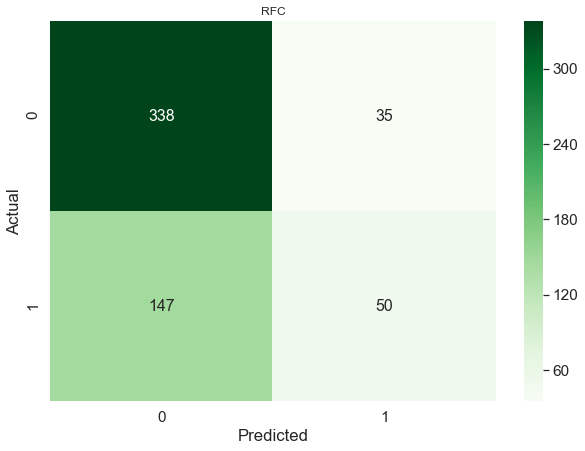

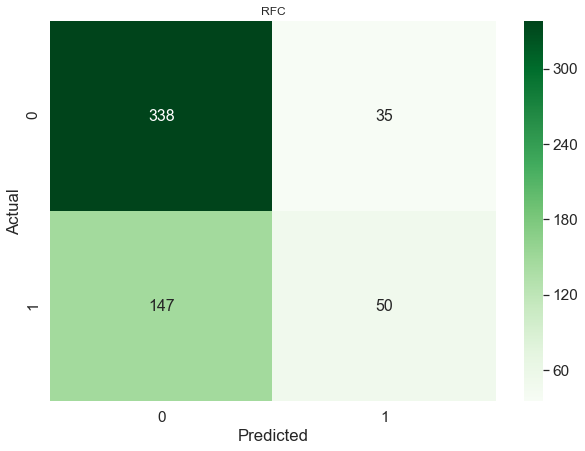

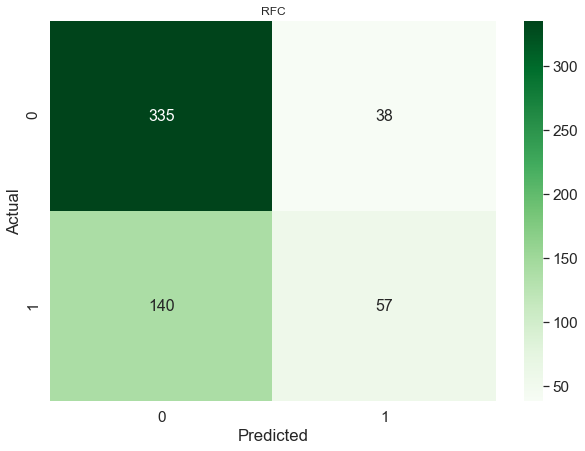

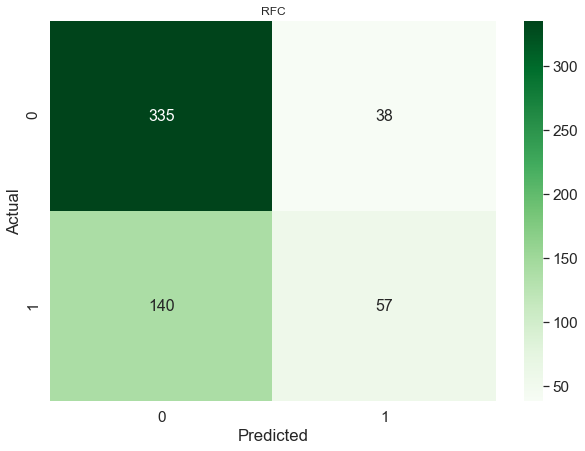

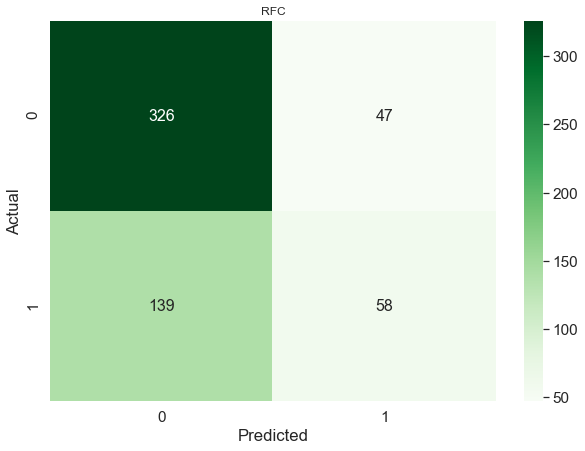

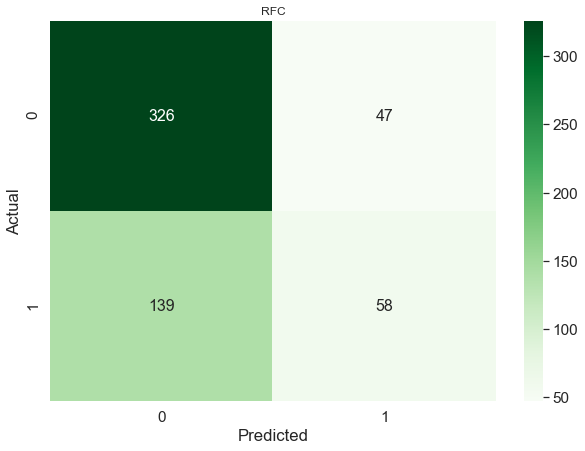

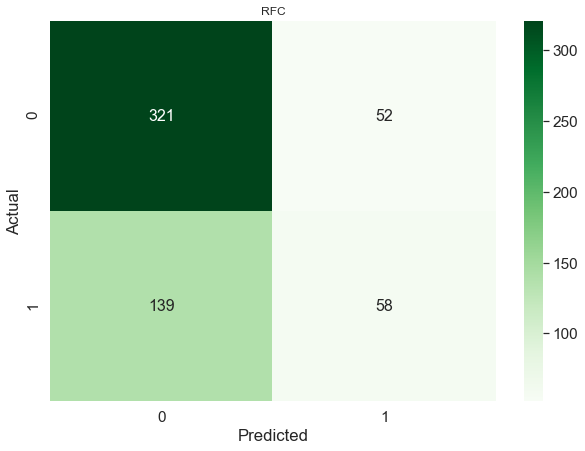

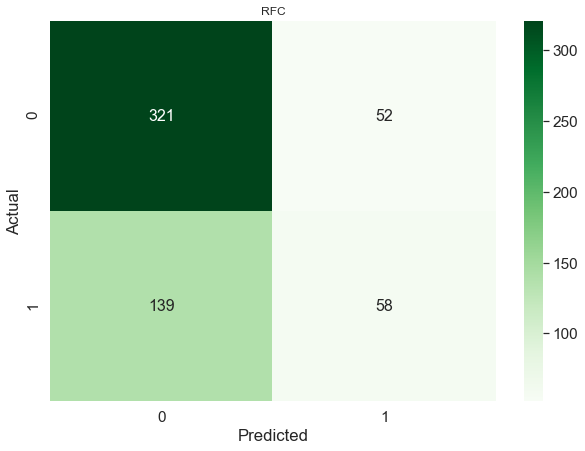

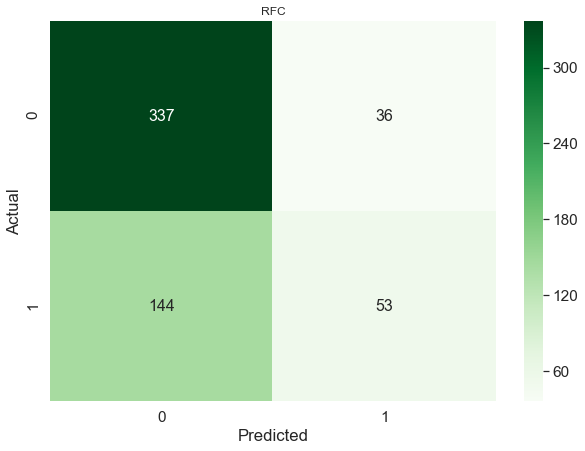

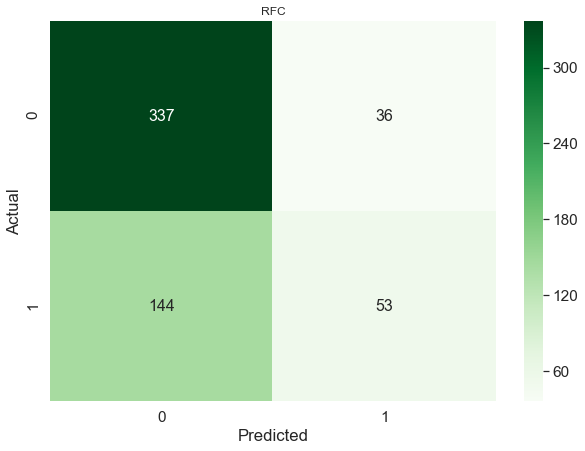

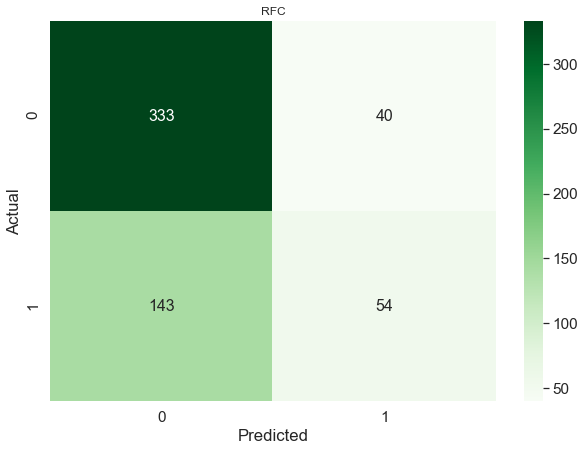

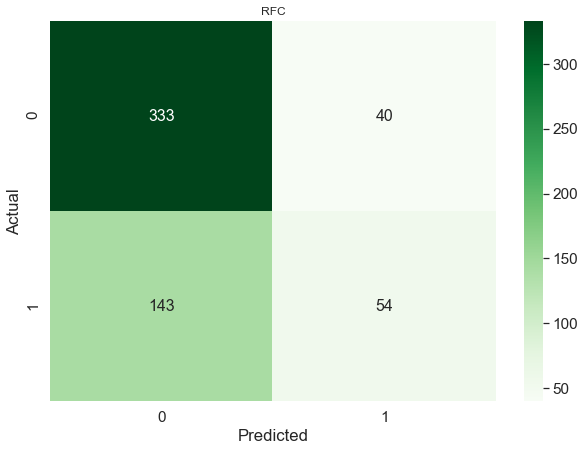

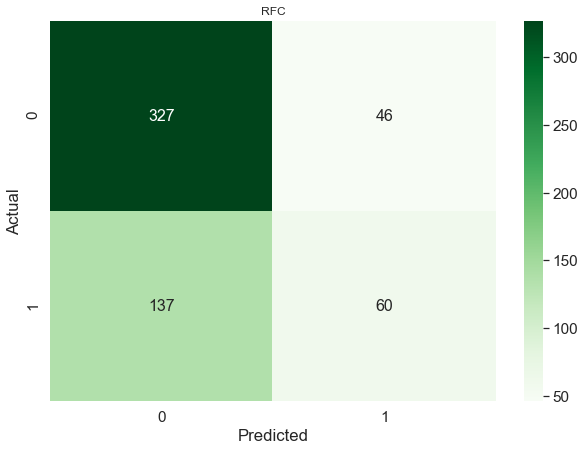

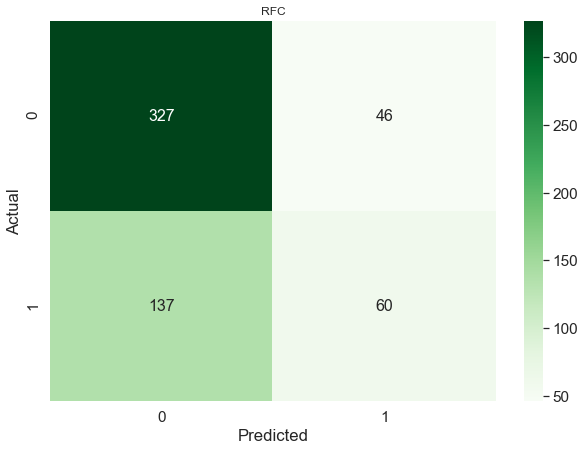

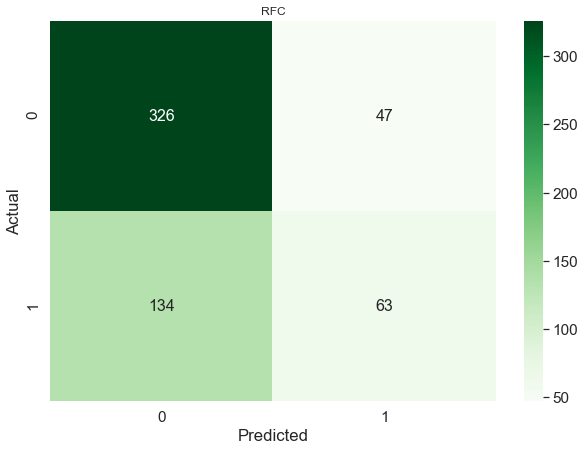

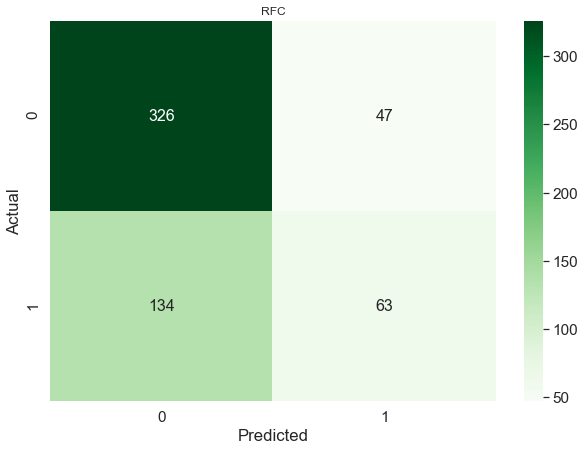

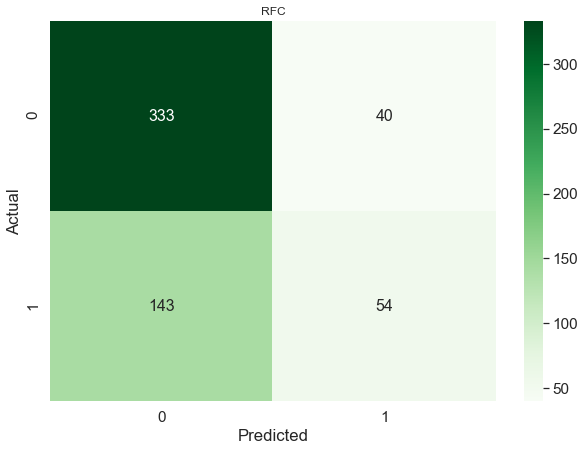

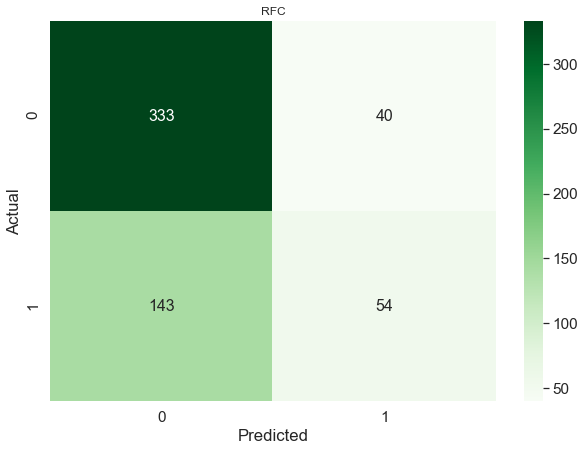

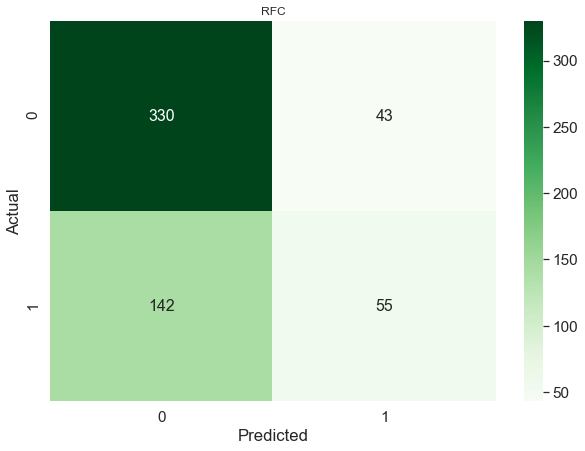

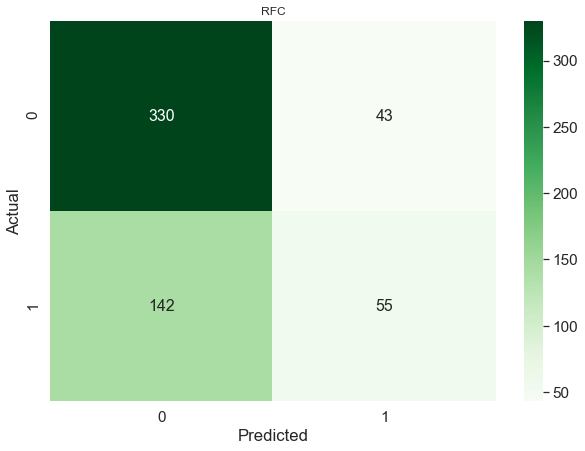

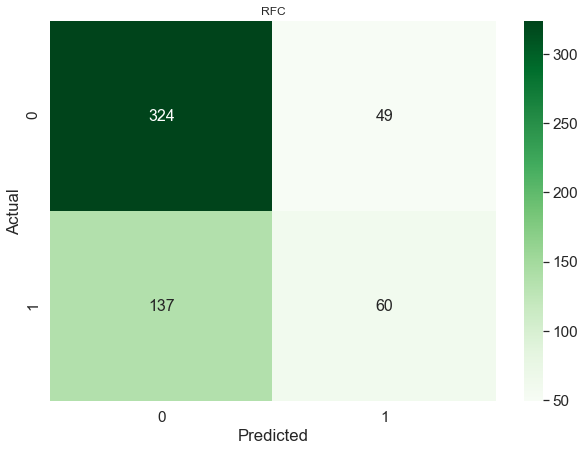

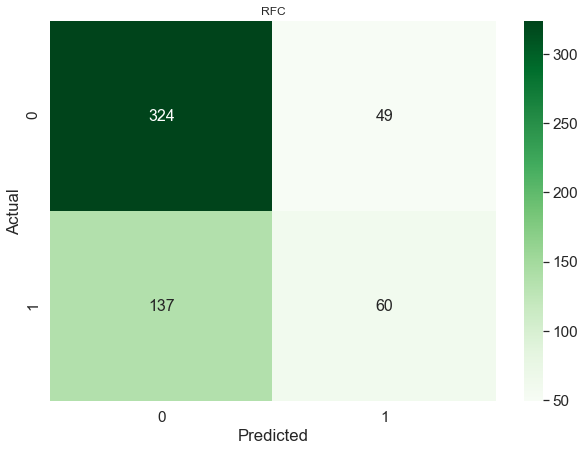

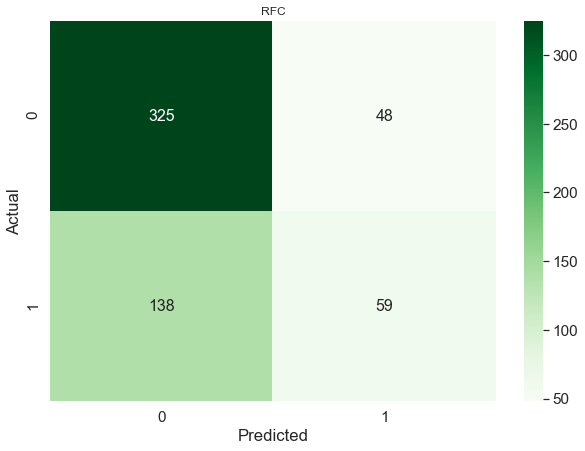

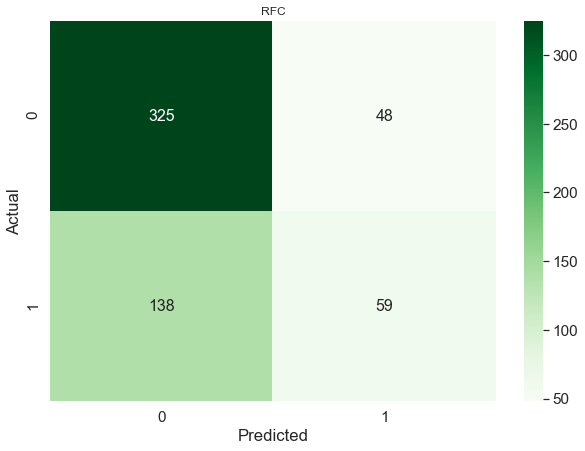

In [8]:
n_estimators = [300, 500, 1000]
max_depth = [7, 10, 12, 14]
params = [(x, y) for x in n_estimators for y in max_depth]
print(params)
auc_ls = []
f1_ls = []

# # Random Forest
# rfc = RandomForestClassifier(n_estimators=1100, max_depth = 3, random_state=19, n_jobs=-1)
# rfc.fit(X_train, y_train)

for i in params:
    rfc = RandomForestClassifier(n_estimators = i[0], max_depth = i[1], random_state=456)
    rfc.fit(X_train, y_train)
    auc = print_metrics(X_test, y_test, rfc, "RFC")[2]
    f1 = print_metrics(X_test, y_test, rfc, "RFC")[3]
    auc_ls.append(auc)
    f1_ls.append(f1)

[3.4 2.6 1.2 1.1 3.5 2.6 1.3 1.  3.6 2.6 1.9 1.4]
[1.   1.35 1.29 1.23 1.16 1.16 1.41 1.55 1.16 1.18 1.37 1.33]


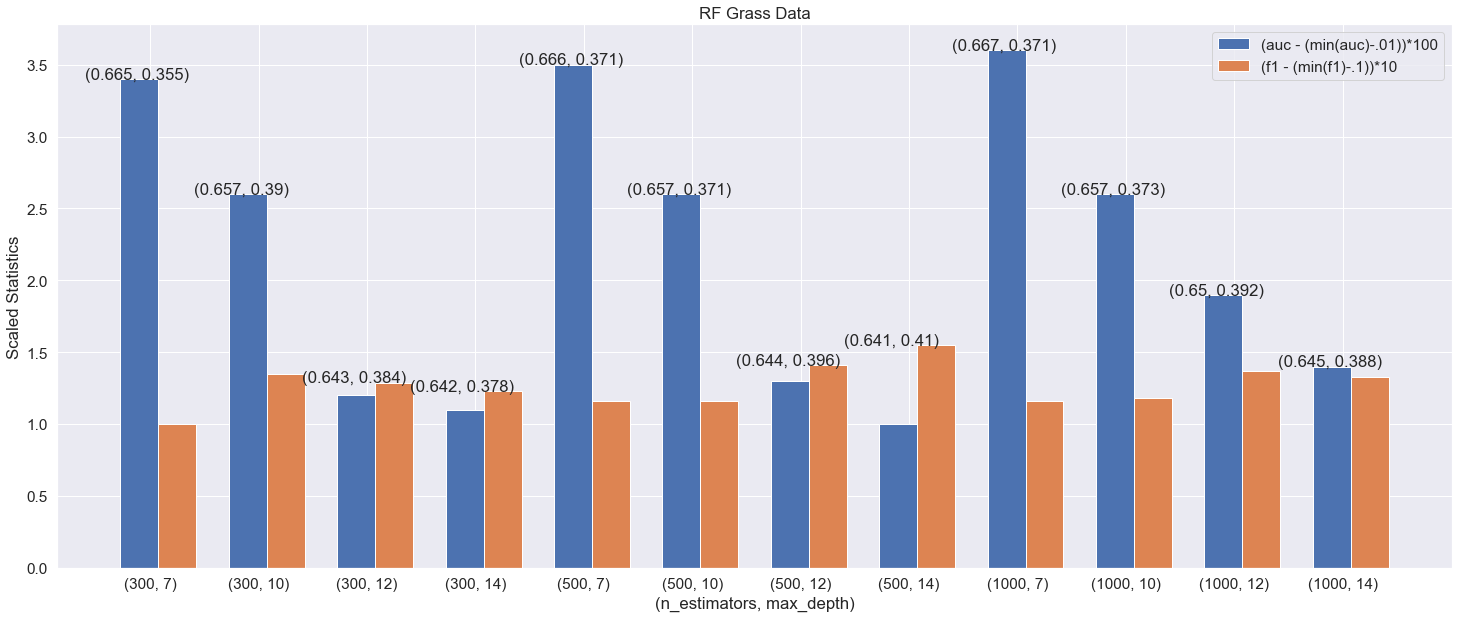

In [14]:
# Scale for plotting
scale_auc_ls = (auc_ls - (min(auc_ls)-.01))*100
print(scale_auc_ls)
scale_f1_ls = (f1_ls - (min(f1_ls)-.1))*10
print(scale_f1_ls)

# Plot
n_combos = len(params)
index = np.arange(n_combos)
axes = plt.gca()
bar_width = .35

aucs = plt.bar(index, scale_auc_ls, bar_width, label = "(auc - (min(auc)-.01))*100")
f1s = plt.bar(index+bar_width, scale_f1_ls, bar_width, label = "(f1 - (min(f1)-.1))*10")

plt.xticks(index+.1, params)
for i, v in enumerate(scale_auc_ls):
    plt.text(i - .5, max(scale_auc_ls[i], scale_f1_ls[i]), str((auc_ls[i], f1_ls[i])))

plt.xlabel("(n_estimators, max_depth)")
plt.ylabel("Scaled Statistics")
plt.title("RF Grass Data")
plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,Model,Accuracy,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Sensitivity,Specificity,AUC,F1-Score,Geometric Mean,Kappa-Statistics,Sklearn Version
0,RFC,0.689,0.305,0.893,0.107,0.695,0.305,0.893,0.653,0.404,0.522,0.223,0.22


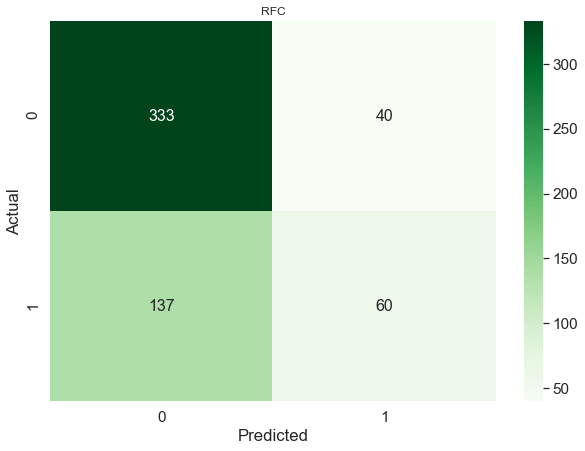

In [10]:
rfc = RandomForestClassifier(n_estimators = 1000, max_depth = 10)
rfc.fit(X_train, y_train)
print_metrics(X_test, y_test, rfc, "RFC")[1]

In [11]:
y_test_prob = rfc.predict_proba(X_wimby_2019)[:,1]
y_pred = rfc.predict(X_test)
y_test_prob

array([0.09101215, 0.5522851 , 0.21011438, 0.20245288, 0.24234555,
       0.07842106, 0.14152425, 0.13923055, 0.13506333, 0.44991509,
       0.1920084 , 0.15201555, 0.16623751, 0.43346043, 0.40634862,
       0.44605985])

In [12]:
rfc.predict_proba(X_wimby_2019)

array([[0.90898785, 0.09101215],
       [0.4477149 , 0.5522851 ],
       [0.78988562, 0.21011438],
       [0.79754712, 0.20245288],
       [0.75765445, 0.24234555],
       [0.92157894, 0.07842106],
       [0.85847575, 0.14152425],
       [0.86076945, 0.13923055],
       [0.86493667, 0.13506333],
       [0.55008491, 0.44991509],
       [0.8079916 , 0.1920084 ],
       [0.84798445, 0.15201555],
       [0.83376249, 0.16623751],
       [0.56653957, 0.43346043],
       [0.59365138, 0.40634862],
       [0.55394015, 0.44605985]])